# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos. 
Se utilizará el método .read_csv de pandas con cada archivo respectivamente. Se noto que los archivos tienen el delimitador (;), por lo que se usará el parámetro sep= en read_csv().


In [1]:
import pandas as pd #importacion de pandas
from matplotlib import pyplot as plt #importacion de pyplot

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')# leer conjuntos de datos en los DataFrames
products = pd.read_csv('/datasets/products.csv', sep = ';')
aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
departments = pd.read_csv('/datasets/departments.csv', sep = ';')
order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')

In [3]:
display(orders.head()) #mostrar primeras cinco columnas
orders.info() # mostrar información del DataFrame

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
display(products.head()) #mostrar primeras cinco columnas
products.info(show_counts=True)# mostrar información del DataFrame

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
display(aisles.head()) #mostrar primeras cinco columnas
aisles.info()# mostrar información del DataFrame

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
display(departments.head()) #mostrar primeras cinco columnas
departments.info()# mostrar información del DataFrame# mostrar información del DataFrame

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
display(order_products.head()) #mostrar primeras cinco columnas
order_products.info(show_counts=True)# mostrar información del DataFrame# mostrar información del DataFrame

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

 Descripción de los datos.
En el DataFrame de orders que tiene 478967 entradas, solamente la columna days_since_prior_order presenta 28,819 valores no nulos. Una posibilidad es que esos valores ausentes se presenten por los clientes que no han tenido una segunda orden. Todas las columnas del DataFrame son enteros, excepto days_since_prior_order que es de tipo decimal.

El DataFrame de productos tiene 4 columnas y 49694 entradas o filas. La columna product_name tiene 1250 valores ausentes . Todas las columnas son valores enteros, excepto product_name, el cual es un string.
Por último el DataFrame order_products tiene 4545007 entradas y cuatro columnas. La columna add_to_cart_order tiene 836 valores ausentes. Todas las columnas son de data type enteros, excepto add_to_cart_order la cual es flotante.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

* Se usará .duplicated() en cada uno de los Datasets para determinar el número de elementos duplicados. En caso de que haya duplicados se revisará si las líneas duplicadas tienen algo en común.
* Se van a eliminar duplicados usando el método .drop_duplicates().reset_index(drop=True), así como para hacer reset all indice del DataFrame.
* Se revisarán valores ausentes en cada DataFrame con .isna() y se reemplazarán con el valor adecuado si es necesario.


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
orders.duplicated()
duplicate_rows = orders[orders.duplicated()]
duplicate_rows# Revisa si hay pedidos duplicados

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? Si, hay 15 lineas duplicadas. Tienen en comun quelos pedidos se ordenaron  el mismo dia (miercoles)  y a la misma hora (2 am).

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado? La cantidad de pedidos resultante con los mismos criterios que los duplicados es de 121,mayor comparacion de las 15 filas obtenidas de los duplicados.

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders.duplicated(subset= ['order_id']).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

*Se encontraron 15 pedidos duplicados los cuales se hicieron el día miércoles a las 2 am. Después de verificar los pedidos que se hicieron bajo las condiciones mencionadas anteriormente, nos dio el resultado de 121 pedidos. Podemos asumir que los 15 pedidos duplicados son errores y por ende se eliminaron.


### `products` data frame

In [13]:
products.duplicated().sum()
# Verifica si hay filas totalmente duplicadas

0

In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
products.duplicated(subset= ['product_id']).sum()

0

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
products[products.duplicated(subset= ['product_name'])]


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products[~(products['product_name'].isna())  &  (products.duplicated(subset= ['product_name']))]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.
* Hay nombres de productos repetidos, pero el ID es diferente. Se crearia confusion si se presentaran filas iguales o que hubieran ID's de productos duplicados, ya que cada producto tiene un ID unico. Entonces, mientras los productos tengan ID's diferentes, los productos pueden tener nombres iguales sin percibirse como duplicados.

### `departments` data frame

In [17]:
departments.duplicated().sum() # Revisa si hay filas totalmente duplicadas

0

In [18]:
departments[departments.duplicated(subset= ['department_id'])]# Revisa únicamente si hay IDs duplicadas de productos

,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos.

*No se encontraron filas duplicada en el DF, ni tampoco ID's duplicadas de productos.

### `aisles` data frame

In [19]:
aisles.duplicated().sum()# Revisa si hay filas totalmente duplicadas

0

In [20]:
aisles[aisles.duplicated(subset= ['aisle_id'])]# Revisa únicamente si hay IDs duplicadas de productos

,aisle_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ellos.

*No se encontraron filas duplicada en el DF, ni tampoco ID's duplicadas de pasillos.

### `order_products` data frame

In [21]:
order_products.duplicated().sum()# Revisa si hay filas totalmente duplicadas


0

In [22]:
order_products[order_products.duplicated(subset = ['order_id', 'product_id'])]
# Vuelve a verificar si hay cualquier otro duplicado engañoso

,order_id,product_id,add_to_cart_order,reordered


Describe brevemente tus hallazgos y lo que hiciste con ellos.

*No se encontraron filas duplicada en el DF, ni tampoco ID's duplicadas de pasillos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
products[products['product_name'].isna()]
# Encuentra los valores ausentes en la columna 'product_name'

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
* Los valores ausentes de la columna product_name corresponden al pasillo 100 y al departamento con el id 21.

In [24]:
#¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [25]:
products[(products['product_name'].isna()) & (products['aisle_id']  != 100)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

*No hay productos ausentes fuera del pasillo con ID 100.

In [26]:
products[(products['product_name'].isna()) & (products['department_id'] != 21)]
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

*No hay productos ausentes fuera del departmento con ID 21.

In [27]:
aisle_label = aisles.loc[aisles['aisle_id'] == 100, 'aisle']
department_label = departments.loc[departments['department_id'] == 21, 'department']

display(f'Aisle Label:', aisle_label)
display("Department Label:", department_label)
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


'Aisle Label:'

99    missing
Name: aisle, dtype: object

'Department Label:'

20    missing
Name: department, dtype: object

Describe brevemente cuáles son tus hallazgos.
*Las etiqueta o nombre de aisle_id y department_id respectivamente es missing (faltante)


In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

* Despues de ver que en efecto los nombres de los productos ausentes estan relacionados con el pasillo 100 y el departamento 21, los cuales ambos tienen la etiqueta de 'missing', se llamo al metodo .fillma para sustituir los Nan por 'Unknown' y se llamo a .info para comprobar el cambio.

### `orders` data frame

In [29]:
orders[orders['days_since_prior_order'].isna()]
# Encuentra los valores ausentes

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [30]:
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.

* Todos los valores faltantes en days_since_prior_order son de clientes lo cuales es su primer orden.

### `order_products` data frame

In [31]:
order_products[order_products['add_to_cart_order'].isna()]
# Encuentra los valores ausentes

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [32]:
display(order_products['add_to_cart_order'].min())
display(order_products['add_to_cart_order'].max())
# ¿Cuáles son los valores mínimos y máximos en esta columna?


1.0

64.0

Describe brevemente cuáles son tus hallazgos. 

*El valor minimo en la columna que describe el orden en como los productos se agregaron al carrito es obviamente 1, mientras que el valor maximo es 64. Se podria deducir que la orden mas grande consto de 64 articulos, lo cual es poco probable.

In [33]:
stored_miss_id = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

In [34]:
orders_miss = order_products[order_products['order_id'].isin(stored_miss_id)].groupby('order_id')
orders_miss['product_id'].count().min()

# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


65

Describe brevemente cuáles son tus hallazgos.

*Se puede concluir que los pedidos con valores ausentes en efecto cuentan con mas de 64 articulos. El valor minimo de product_id es de 65.


In [35]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
order_products.info(show_counts = True)
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
* Se identificaron valores ausentes en la columna add_to_cart_order y se sustituyeron con el valor 999. Tambien se convirtio la columna al tipo entero.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. 


*Se encontraron 15 pedidos duplicados en orders, con la particularidad de tener la misma hora y día en que pidieron. Se asumieron como errores  y se eliminaron.

*En departments, aisles y order_products no se encontraron duplicados.

*En products los valores ausentes corresponden a un pasillo y departamento con la etiqueta de missing respectivamente. Se sustituye el valor de los Nan por Unknown.

*Los valores ausentes de orders corresponden  a la columna days_since_prior_order.  Se comprobo que esos NaN corresponden a primeras ordenes de los clientes.


*Tambien se verifico que los pedidos con valores ausentess en efecto cuentan con mas de 64 articulos. El valor minimo de product_id es de 65. Estos se sustituyeron con valor 999 en la columna add_to_cart_order'



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] 

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
sorted(orders['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [37]:
sorted(orders['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]

Escribe aquí tus conclusiones
* Se puede afirmar que las horas oscilan entre las 12am y las 11pm, asi como los dias de la semama de domingo (0) a sabado (6).

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<function matplotlib.pyplot.show(close=None, block=None)>

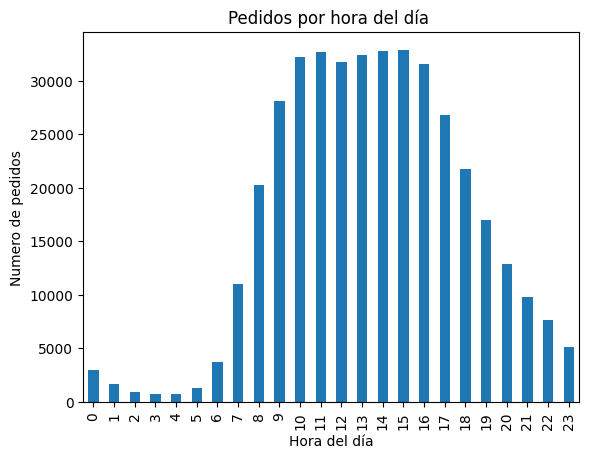

In [38]:

hourly_order_counts = orders.groupby('order_hour_of_day')['user_id'].nunique()
hourly_order_counts.plot(kind = 'bar',
                        title = "Pedidos por hora del día ",
                        xlabel = "Hora del día",
                        ylabel= "Numero de pedidos"
                        )
plt.show

Escribe aquí tus conclusiones
* Se puede observar que la mayoria de los pedidos se hacen durate el dia.  Los pedidos incrementan a partir de las 9 de la manana y disminuyen drasticamente a partir de las 5 de la tarde, sin embargo la horas con mas trafico son 11:00 am y entre 1:00 y 2:00 pm.

### [A3] ¿Qué día de la semana compran víveres las personas?

<function matplotlib.pyplot.show(close=None, block=None)>

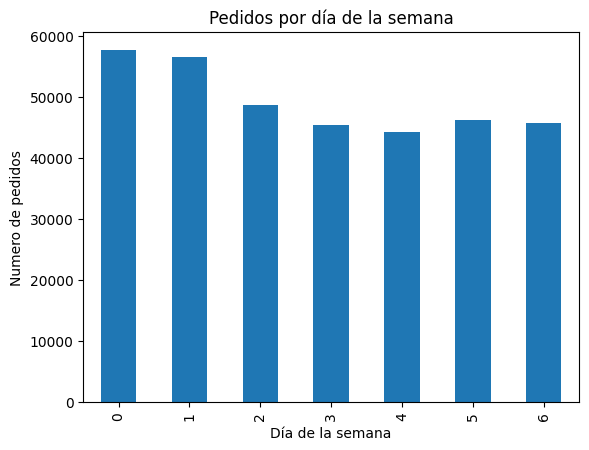

In [39]:
daily_order_counts = orders.groupby('order_dow')['user_id'].nunique()
daily_order_counts.plot(kind = 'bar',
                        title = "Pedidos por día de la semana",
                        xlabel = "Día de la semana",
                        ylabel= "Numero de pedidos"
                        )
plt.show

Escribe aquí tus conclusiones

Los dias domingo y lunes presentan mayor cantidad de pedidos. El dia con menos pedidos es el jueves. Conforme inicia la semana disminuyen los pedidos. Quizas el viernes por la tarde las personas deciden hacer compras, y sabado/domingo hay bastante actividad pues es cuando se tiene mas tiempo libre para hacer este tipo de actividades.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

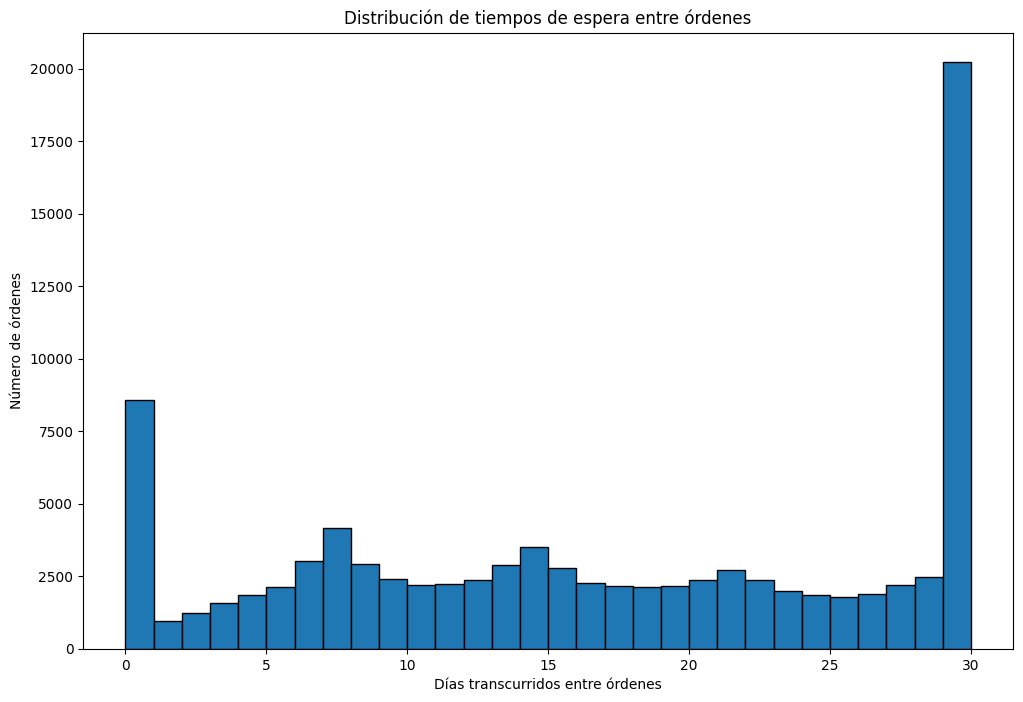

In [40]:
# Obtener tiempo de espera entre ordenes por cliente.
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)  # Remplazer NaN con 0 para la primera orden
user_waiting_times = orders.groupby('user_id')['days_since_prior_order'].sum()

# Crear histograma
plt.figure(figsize=(12, 8))
plt.hist(user_waiting_times, bins=30, edgecolor='k', range=(0, 30))
plt.xlabel('Días transcurridos entre órdenes')
plt.ylabel('Número de órdenes')
plt.title('Distribución de tiempos de espera entre órdenes')
plt.show()




Escribe aquí tus conclusiones
* Se puede ver un incremento de ordenes alrededor del dia 7 aproximadamente y otro pico alrededor de los dias 15 y 21. Se puede deducir que ciertos clientes hacen compras semanales y otros quincenales, pero parece que la preferencia es esperar un mes para volver a hacer un pedido.

# [B] 

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [29]:
ow = orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
os = orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()
df_concat = pd.concat([ow, os], axis='columns')
df_concat
 


,order_hour_of_day,order_hour_of_day
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


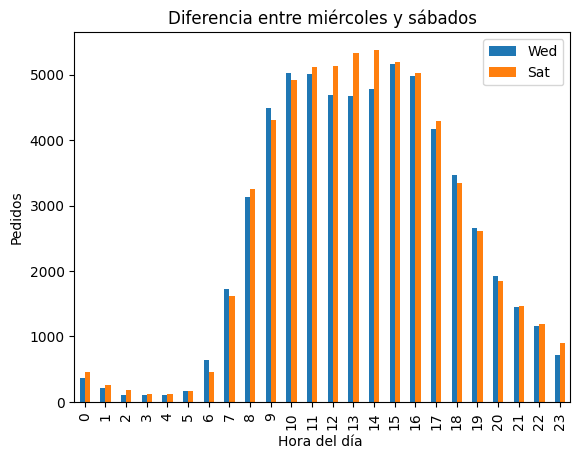

In [30]:
df_concat.plot(
        kind='bar',
        title='Diferencia entre miércoles y sábados',
        xlabel='Hora del día ',
        ylabel='Pedidos')

plt.legend(['Wed', 'Sat'])
plt.show()

Escribe aquí tus conclusiones

* Las distribuciones parecen similares en los miércoles y los sábados. Sim embargo a partir de las 11am a las 2pm se ve un pico de incremento considerable en el volumen de pedidos los sábados.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
customer_order_counts = orders['user_id'].value_counts()
order_distribution = customer_order_counts.value_counts().sort_index()

order_distribution

1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: user_id, dtype: int64

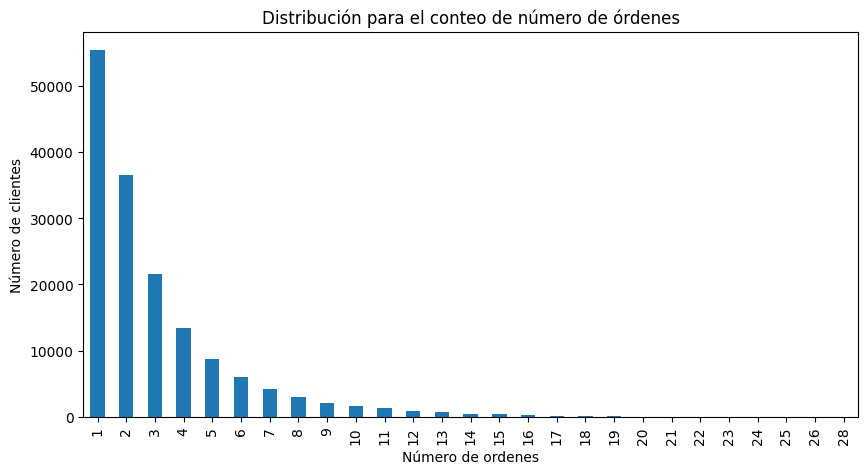

In [44]:
order_distribution.plot(kind = 'bar',
                       figsize=[10,5],
                       xlabel = 'Número de ordenes',
                       ylabel = 'Número de clientes',
                       title = 'Distribución para el conteo de número de órdenes')

plt.show()

Escribe aquí tus conclusiones

* Se ve claramente la tendencia donde el mayor volumen de clientes ha pedido de 1 a 3 pedidos. Para el cuarto pedidod el numero de clientes disminuye a 13,498. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
df_top20 = order_products.merge(products, on='product_id')
top = df_top20.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending = False)
top.head(20)

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,66050,66050,66050,66050,66050
13176,BAG OF ORGANIC BANANAS,53297,53297,53297,53297,53297
21137,ORGANIC STRAWBERRIES,37039,37039,37039,37039,37039
21903,ORGANIC BABY SPINACH,33971,33971,33971,33971,33971
47209,ORGANIC HASS AVOCADO,29773,29773,29773,29773,29773
47766,ORGANIC AVOCADO,24689,24689,24689,24689,24689
47626,LARGE LEMON,21495,21495,21495,21495,21495
16797,STRAWBERRIES,20018,20018,20018,20018,20018
26209,LIMES,19690,19690,19690,19690,19690


Escribe aquí tus conclusiones

* El producto con mas pedidos son los platanos con 66050 reorders.  Se observa que los 20 productos mas pedidos son frutas y legumbres, a excepcion de la leche entera.  Los clientes tienen una preferencia por los productos organicos. De 20 prodctos en la lista, 15 caen en esa categoria.

# [C]

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [31]:
items_per_order = order_products.groupby('order_id')['product_id'].count() 
#obtener el numero de articulos en cada orden
graph_values = items_per_order.value_counts().sort_index() #graficar valores
graph_values

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

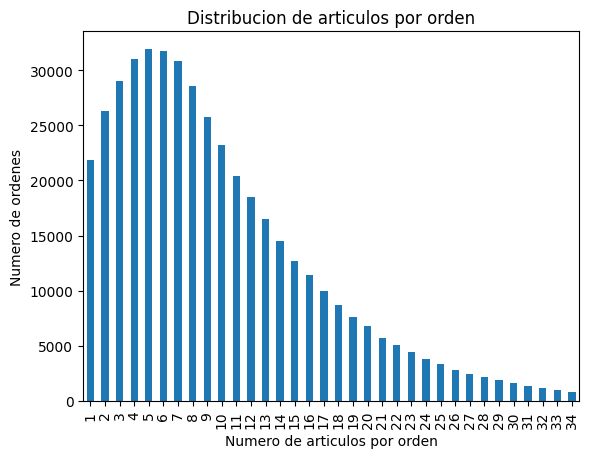

In [47]:
graph_values[graph_values.index < 35].plot(kind = 'bar', 
                     xlabel = 'Numero de articulos por orden',
                     ylabel = 'Numero de ordenes',
                     title = 'Distribucion de articulos por orden'
                    )

plt.show

#### Escribe aquí tus conclusiones

* Se puede observar que la mayoria de clientes tiende a hacer mas pedidos que constan entre 4 a 6 articulos.  

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [48]:
p20_reordered = order_products[order_products['reordered'] == 1]
p20_reordered.head()

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1


In [49]:
df_top20 = p20_reordered.merge(products, on='product_id')


In [50]:
top = df_top20.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending = False)


In [51]:
top.head(20)

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,55763,55763,55763,55763,55763
13176,BAG OF ORGANIC BANANAS,44450,44450,44450,44450,44450
21137,ORGANIC STRAWBERRIES,28639,28639,28639,28639,28639
21903,ORGANIC BABY SPINACH,26233,26233,26233,26233,26233
47209,ORGANIC HASS AVOCADO,23629,23629,23629,23629,23629
47766,ORGANIC AVOCADO,18743,18743,18743,18743,18743
27845,ORGANIC WHOLE MILK,16251,16251,16251,16251,16251
47626,LARGE LEMON,15044,15044,15044,15044,15044
27966,ORGANIC RASPBERRIES,14748,14748,14748,14748,14748


Escribe aquí tus conclusiones
* Se puede ver que los platanos son claramente los artículos que se vuelven a pedir con mayor frecuencia. Tanto regulares como organicos.Solamente dos productos del resto de lista NO son frutas y/o vegetales. Los dos productos que caen fuera de estas categorias se pueden considerar lacteos: leche entera organica y half & half organica.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [52]:
merged_datarep = products.merge(order_products, on='product_id')
merged_datarep

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,CHOCOLATE SANDWICH COOKIES,61,19,1104373,11,1
1,1,CHOCOLATE SANDWICH COOKIES,61,19,1774977,4,1
2,1,CHOCOLATE SANDWICH COOKIES,61,19,652770,10,0
3,1,CHOCOLATE SANDWICH COOKIES,61,19,1000035,6,1
4,1,CHOCOLATE SANDWICH COOKIES,61,19,1679949,9,0
...,...,...,...,...,...,...,...
4545002,49694,BURRITO- STEAK & CHEESE,38,1,3034802,10,0
4545003,49694,BURRITO- STEAK & CHEESE,38,1,3175081,3,0
4545004,49694,BURRITO- STEAK & CHEESE,38,1,694132,2,0
4545005,49694,BURRITO- STEAK & CHEESE,38,1,2843165,5,0


In [53]:
reordered_product = merged_datarep.groupby(['product_id', 'product_name'])['reordered'].mean().reset_index().sort_values(by='reordered', ascending=False).reset_index()

In [54]:
reordered_product

,index,product_id,product_name,reordered
0,13453,14721,BONE STRENGTH TAKE CARE,1.0
1,19195,20949,VANILLA SANDWICH COOKIES,1.0
2,6136,6723,PALMIERS- PETITE,1.0
3,6144,6732,NATURALLY SPARKLING MINERAL WATER,1.0
4,41319,45088,CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & ...,1.0
...,...,...,...,...
45568,9559,10485,CARAMEL APPLE POP,0.0
45569,34562,37690,CALYPSO FRESH 2X CONCENTRATED SCENTSATIONS 166...,0.0
45570,9558,10484,AVOCADO AND GREENS,0.0
45571,9548,10474,NUSTEVIA WHITE STEVIA POWDER,0.0


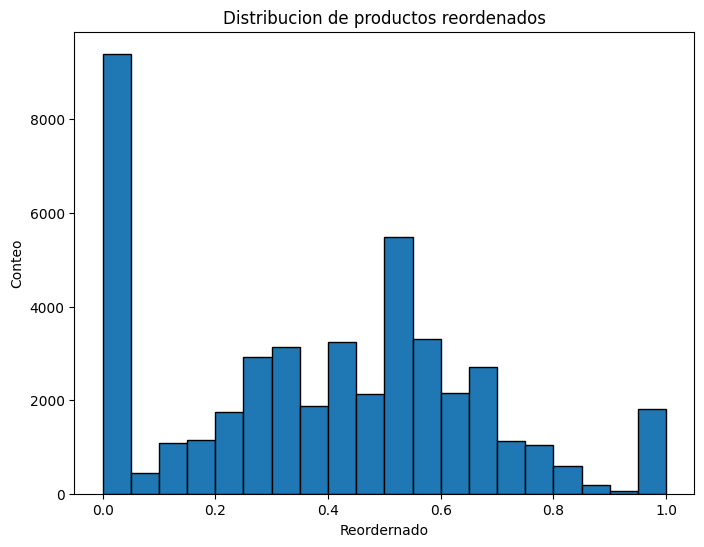

In [55]:
reordered_values = reordered_product['reordered']
plt.figure(figsize=(8, 6))
plt.hist(reordered_values, bins=20, edgecolor='k')  
plt.title('Distribucion de productos reordenados')
plt.xlabel('Reordernado')
plt.ylabel('Conteo')
plt.show()

Escribe aquí tus conclusiones
* Se puede observar que muchos prodcutos si han sido reordenados, pero hay mas productos que solo se han ordenado 1 vez.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [56]:
merged_20 = orders.merge(order_products, on='order_id')
merged_20.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048,1,1
1,1515936,183418,11,6,13,30.0,47766,3,1
2,1515936,183418,11,6,13,30.0,45066,9,0
3,1515936,183418,11,6,13,30.0,24082,11,0
4,1515936,183418,11,6,13,30.0,24363,4,0


In [57]:
reordered_client = merged_20.groupby('user_id')['reordered'].mean().sort_values(ascending = False).reset_index()

reordered_client


,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


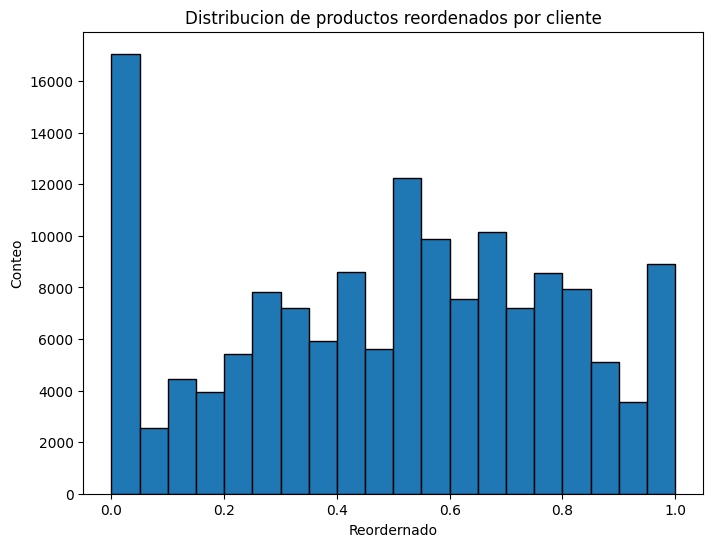

In [58]:
reordered_pr = reordered_client['reordered']
plt.figure(figsize=(8, 6))
plt.hist(reordered_pr, bins=20, edgecolor='k')  
plt.title('Distribucion de productos reordenados por cliente')
plt.xlabel('Reordernado')
plt.ylabel('Conteo')
plt.show()

Escribe aquí tus conclusiones
* La mayoria de los clientes no han vuelto a ordenar sus productos en la plataforma.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
df_orders = order_products.merge(products)
first_20 = df_orders[df_orders['add_to_cart_order'] == 1]


In [ ]:
first_in_cart = first_20.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending = False)

In [ ]:
first_in_cart.head(20)

### Conclusion general del proyecto:
Para analizar esta información se cargaron las librerías pandas y matplotlib. Se leyeron y se trabajó con 5 data frames: order, products, aisles, departments y order_products.

La primera consistió en  usar los parámetros adecuados para leer los datos y se analizó la composición de cada Data Frame (número de entradas, número de filas y columnas, non-null values)

En el preprocesamiento de los datos se  revisaron y corrigieron los tipos de datos de los archivos. También se  identificaron y completaron los valores ausentes y se identificaron y eliminaron  los valores duplicados en caso de ser necesario.

 
Para el análisis de datos se trabajó con diferentes filtros y gráficos que llevaron a la observación de los siguientes puntos:

Se determinó que la mayor parte de los pedidos se realizan durante el día, siendo el pico más alto entre las 10 am y 4 pm.
Los clientes hacen más pedidos los domingos y lunes. El resto de la semana decrece la actividad y vuelve a incrementarse los viernes. Esto se debe a que una mayor cantidad de clientes tienen más tiempo en fin de semana para realizar compras.
Los clientes esperan alrededor de 7 días para realizar  otro pedido. Se observó un incremento de órdenes en los días 7,15 y 21. 
Sin embargo,las personas prefieren esperar un mes para volver a hacer un pedido.
Cuando se compararon dos días, miércoles y sábado, se notó que la diferencia en actividad fue durante el horario diurno de 10am a 4pm. Durante ese segmento del día los pedidos en día sábado fueron mayores que los del miércoles. Esto parece estar relacionado con el tiempo libre de fin semana de los clientes.
En cuanto a la distribución para el número de pedidos por cliente se puede concluir que oscila entre 1 a 4 pedidos por cliente en general.
Haciendo referencia a los productos más pedidos, los plátanos es el producto más comprado. Los productos más populares son frutas, legumbres y leche entera. Los clientes tienen una preferencia por los productos orgánicos. De 20 productos en la lista, 15 caen en esa categoría.
 Las personas  compran normalmente entre 4 a 6 artículos por orden.
 En cuanto a  los 20 principales artículos que vuelven a pedirse con mayor frecuencia los plátanos son claramente los artículos que se vuelven a pedir con mayor frecuencia. Solamente dos productos del resto de la lista no son frutas y/o vegetales. Los dos productos que caen fuera de estas categorías son lácteos.
Finalmente, el producto que   las personas ponen primero en sus carritos son plátanos. Aparecen productos que no estaban en el top 20 de productos más pedidos como el agua, agua mineral de toronja y la soda,. Entonces ciertas bebidas, aparte de frutas, legumbres y ciertos lácteos, son de los primeros productos que los clientes agregan al carrito.

